### Exploring Splitting with Gini Index and Entropy
- This will be repurposed from Decision Tree Classifiers

In [1]:
from dataclasses import dataclass
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = load_iris()
X,y = data['data'], data['target']

### Implementing Equation 18.5 

The goal of a Decision Tree is to find feature $j_i$ and threshold $t_i$ that minimizes the weighted sum of the cost of Left Subtree $c(D^L_i(j,t))$ and Right Subtree $c(D^R_i(j,t))$

Or more precisely
> $(j_i, t_i) = \arg \min_{j \in \{1,..,D\}} \min_{t \in T_j} \frac{|D^L_i (j,t)|}{|D_i|} c(D^L_i(j,t)) + \frac{|D^R_i (j,t)|}{|D_i|} c(D^R_i(j,t))$

We're implementing the equation above.

### Gini Index 

For classification, we first compute the empirical distribution over class labels for this node: 

> $\hat{\pi_{ic}} = \frac{1}{ | D_i |} \sum_{n \in D_i}\mathbb{ I(y_n = c) }$

Given this, we can then compute the **Gini Index**

> $G_i = \sum_{c=1}^{C} \hat{\pi_{ic}} (1 - \hat{\pi_{ic}}) = \sum_{c=1}^C \hat{\pi_{ic}} - \sum_{c=1}^C \hat{\pi_{ic}}^2 = 1 - \sum_{c=1} \hat{\pi_{ic}}^2$

In [7]:
# Viewing contents of y
np.unique(y)

array([0, 1, 2])

In [5]:
feat_index = 0
plt_figsize = (8,4)

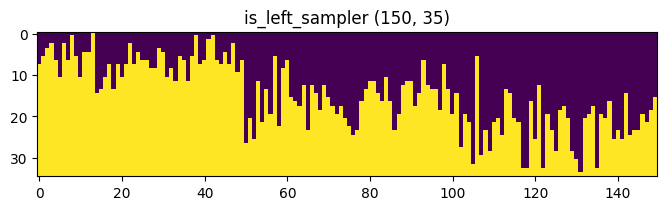

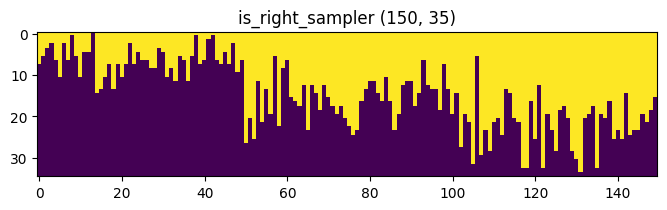

In [6]:
feat_index = 0

thresh = np.unique(X[:,feat_index]).reshape(1,-1)
selected_feat = X[:,feat_index].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~is_left_sampler

stacked_targets = np.hstack([y.reshape(-1,1)] * is_left_sampler.shape[1])
left_sampled, right_sampled = is_left_sampler * stacked_targets, is_right_sampler * stacked_targets

n_samples_left, n_samples_right = np.sum(is_left_sampler, axis=0), np.sum(is_right_sampler, axis=0)


plt.figure(figsize=plt_figsize)
plt.imshow(is_left_sampler.T)
plt.title(f'is_left_sampler {is_left_sampler.shape}')
plt.show()

# Plot for right
plt.figure(figsize=plt_figsize)
plt.imshow(is_right_sampler.T)
plt.title(f'is_right_sampler {is_right_sampler.shape}')
plt.show()